In [2]:
!pip install geopandas

import gc
import glob
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = ('C:/k_digital/Project Data')

plt.rc('font', family='Malgun Gothic')

In [3]:
bus = pd.read_csv(path + '/서울특별시_저상버스 도입 노선 및 노선별 보유율_20230401.csv', encoding = 'euc-kr')

In [4]:
# 데이터 형식 확인
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   노선번호    328 non-null    object 
 1   인가대수    328 non-null    float64
 2   저상대수    328 non-null    float64
 3   보유율     328 non-null    float64
dtypes: float64(3), object(1)
memory usage: 10.4+ KB


In [5]:
# 급행버스 (8로 시작) 추출
# .fillna(False)는 NaN값이 있다는 오류가 발생해서 추가함
gh = bus[bus['노선번호'].str.startswith('8').fillna(False)]
gh

,노선번호,인가대수,저상대수,보유율
284,8146,3.0,3.0,100.0
285,8551,5.0,1.0,20.0
286,8561,5.0,1.0,20.0
302,8773녹번,1.0,1.0,100.0
303,8773홍대,1.0,1.0,100.0


In [6]:
# 8로 시작하는 버스 제거 ~(반대) 사용하고 bus 변수에 대입
bus = bus[~bus['노선번호'].str.startswith('8').fillna(False)]

In [7]:
# 야간버스(N시작) 추출
night = bus[bus['노선번호'].str.startswith('N').fillna(False)]
night

,노선번호,인가대수,저상대수,보유율
304,N13상계,7.0,7.0,100.0
305,N13송파,6.0,5.0,83.3
306,N15사당,8.0,8.0,100.0
307,N15우이,9.0,9.0,100.0
308,N16도봉,7.0,7.0,100.0
309,N16온수,7.0,7.0,100.0
310,N26강서,6.0,6.0,100.0
311,N26중랑,5.0,5.0,100.0
312,N31강동,4.0,4.0,100.0
313,N31정릉,4.0,4.0,100.0


In [8]:
# 야간버스 bus에서 제거
bus = bus[~bus['노선번호'].str.startswith('N').fillna(False)]

In [9]:
# 지선버스 추출
# match 함수 이용해서 일치하는 데이터 추출
# r = \(역슬래시)가 특수문자 취급받지 않도록 함
# ^ = 문자의 시작
# \d = 숫자 문자
# {4} = 4번 반복
# match(r'^\d{4}') = 문자의 시작 4자리가 숫자와 일치

green = bus[bus['노선번호'].str.match(r'^\d{4}').fillna(False)]
green

,노선번호,인가대수,저상대수,보유율
120,1020,15.0,5.0,33.3
121,1111,22.0,20.0,90.9
122,1115,6.0,2.0,33.3
123,1120,14.0,14.0,100.0
124,1124,6.0,1.0,16.7
...,...,...,...,...
293,5522B,10.0,5.0,50.0
294,6640A,9.0,5.0,55.6
295,6640B,10.0,4.0,40.0
296,7013A,9.0,4.0,44.4


In [10]:
bus = bus[~bus['노선번호'].str.match(r'^\d{4}').fillna(False)]

In [11]:
# blue = bus.copy를 하기 위해 bus 데이터 확인
# 01번버스, 마지막 NaN행 확인
bus

,노선번호,인가대수,저상대수,보유율
0,01,14.0,14.0,100.0
1,100,29.0,29.0,100.0
2,101,32.0,20.0,62.5
3,102,20.0,20.0,100.0
4,105,20.0,20.0,100.0
...,...,...,...,...
298,702A,26.0,25.0,96.2
299,702B,14.0,10.0,71.4
300,750A,17.0,17.0,100.0
301,750B,17.0,16.0,94.1


In [12]:
# 01번버스, NaN행 제거
bus = bus.iloc[1:-1]
bus

,노선번호,인가대수,저상대수,보유율
1,100,29.0,29.0,100.0
2,101,32.0,20.0,62.5
3,102,20.0,20.0,100.0
4,105,20.0,20.0,100.0
5,106,19.0,12.0,63.2
...,...,...,...,...
288,110B,22.0,13.0,59.1
298,702A,26.0,25.0,96.2
299,702B,14.0,10.0,71.4
300,750A,17.0,17.0,100.0


In [13]:
# 남은 bus 데이터 blue 변수 부여
blue = bus.copy()
blue

,노선번호,인가대수,저상대수,보유율
1,100,29.0,29.0,100.0
2,101,32.0,20.0,62.5
3,102,20.0,20.0,100.0
4,105,20.0,20.0,100.0
5,106,19.0,12.0,63.2
...,...,...,...,...
288,110B,22.0,13.0,59.1
298,702A,26.0,25.0,96.2
299,702B,14.0,10.0,71.4
300,750A,17.0,17.0,100.0


In [14]:
# 버스 종류별 저상버스 인가대비 보유율 추출
blin = blue['인가대수'].sum()
blbo = blue['저상대수'].sum()
bl = round(blbo / blin,3) * 100

grin = green['인가대수'].sum()
grbo = green['저상대수'].sum()
gr = round(grbo / grin,3) * 100

gbin = gh['인가대수'].sum()
gbbo = gh['저상대수'].sum()
gb = round(gbbo / gbin,3) * 100

niin = night['인가대수'].sum()
nibo = night['저상대수'].sum()
ni = round(nibo / niin,3) * 100

In [15]:
# 저상버스 도입률 데이터프레임 생성
lowbus = pd.DataFrame({'버스종류':['간선버스', '지선버스', '간선 급행버스', '심야버스'], '도입률':[bl, gr, gb, ni]})
lowbus

,버스종류,도입률
0,간선버스,71.9
1,지선버스,73.8
2,간선 급행버스,46.7
3,심야버스,96.5


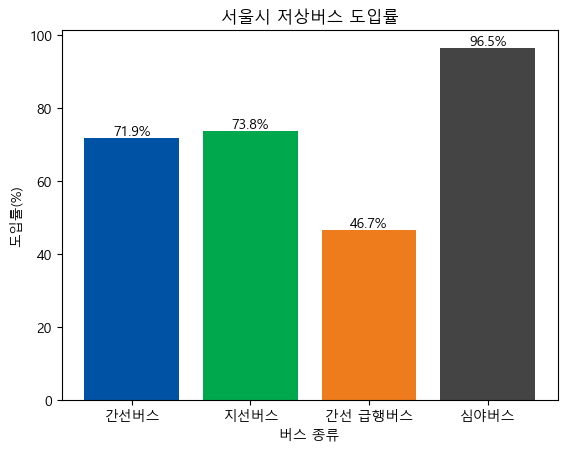

In [16]:
# 버스 종류별 색 지정
colors = ('#0052A4', '#00A84D', '#EF7C1C', '#444444')


# 그래프화
plt.bar(lowbus['버스종류'], lowbus['도입률'], color = colors)
plt.xlabel('버스 종류')
plt.ylabel('도입률(%)')
plt.title('서울시 저상버스 도입률')

for i, v in enumerate(lowbus['도입률']):
    plt.text(i, round(v, 2), str(round(v, 2)) + '%', ha='center', va='bottom')


plt.show()